In [1]:
# ---------- IMPORT LIBRARIES ----------------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score 

import graphviz

In [3]:
# ---------- FUNCTIONS ----------------------

In [4]:
def preprocess(dataTarget):
    le = preprocessing.LabelEncoder()
    le.fit(dataTarget)
    class_labels = le.transform(dataTarget)
    
    return class_labels

In [5]:
def preprocessData(data):
    data = data.replace('Unknown', np.nan)
    data.dropna(inplace=True)
    
    return data

In [6]:
def buildDt(dataAttrs, dataTarget):
    #construct decision tree
    clf = tree.DecisionTreeClassifier(criterion="entropy")
    clf = clf.fit(dataAttrs, dataTarget)
    
    return clf

In [7]:
def printPred(df, testX, testY):
    predictions = df.predict(testX)
    print(metrics.classification_report(testY, predictions))

In [8]:
def drawGraph(clf, X, Y):
    dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names =X.columns,
                                class_names= Y,
                                filled = True,
                                rounded= False,
                                special_characters = True
                               )
    graph = graphviz.Source(dot_data)
    return graph

In [9]:
def predict(df, testX):
    prediction = df.predict(testX)
    return prediction

In [10]:
def printAccuracy(clf, testX, testY):
    prediction = predict(clf, testX)
    accuracy = accuracy_score(testY, prediction)
    print(accuracy)

In [11]:
def getAccuracy(clf, testX, testY):
    prediction = predict(clf, testX)
    accuracy = accuracy_score(testY, prediction)
    return accuracy

In [12]:
# ---------- TRYING OUT SCRIPTS ----------------------

In [13]:
#SCRIPT FOR BACKWARD SUBSET FEATURE SELECTION - ONE AT THE TIME 
attribute = ['address', 'rooms', 'type', 'method', 'realestate_agent', 'date', 'distance', 'postcode', 'bedrooms',
             'bathrooms', 'car_parks', 'landsize', 'building_area', 'year_built',
            'council_area', 'lattitude', 'longtitude', 'region_name', 'suburb_property_count']

acc_score = []

propertyData = pd.read_csv("property_prices.csv")

propertyData = preprocessData(propertyData)

propertyData['lowBand'], propertyData['highBand'] = propertyData['price_bands'].str.split('-', 1).str
propertyData['lowBand'] = propertyData['lowBand'].str[:-1]
propertyData['highBand'] = propertyData['highBand'].str[:-1]

le = preprocessing.LabelEncoder()
for column_name in propertyData.columns:
    if propertyData[column_name].dtype == object:
        propertyData[column_name] = le.fit_transform(propertyData[column_name])
    else:
        pass

for attr in attribute: 

    Y = propertyData['lowBand']
    X = propertyData.drop(columns=['id','lowBand', 'highBand','price_bands', attr])

    XE = pd.get_dummies(X)
    trainX, testX, trainY, testY = train_test_split(np.array(XE), np.array(Y), test_size=0.2)

    le = preprocessing.LabelEncoder()
    le.fit(trainY)
    class_labels = le.inverse_transform([0,1,2,3,4,5,6])

    clf = buildDt(trainX, trainY)
    accuracy = getAccuracy(clf, testX, testY)
    acc_score.append(accuracy)


C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Software\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

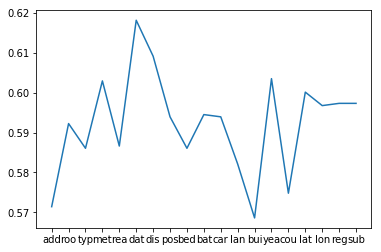

In [14]:
#PRINTING THE ACCURACY SCORE FOR EACH ATTRIBUTE, IF HIGH = REMOVE 
attribute = ['address', 'rooms', 'type', 'method', 'realestate_agent', 'date', 'distance', 'postcode', 'bedrooms',
             'bathrooms', 'car_parks', 'landsize', 'building_area', 'year_built',
            'council_area', 'lattitude', 'longtitude', 'region_name', 'suburb_property_count']

attr = []
for a in attribute:
    attr.append(a[:3])
    
fig = plt.figure()
fig = plt.plot(attr, acc_score)

In [19]:
#SCRIPT FOR SEVERAL ITERATIONS OF BACKWARD SUBSET FEATURE SELECTION
import copy
attribute = ['address', 'rooms', 'type', 'method', 'realestate_agent', 'date', 'distance', 'postcode', 'bedrooms',
             'bathrooms', 'car_parks', 'landsize', 'building_area', 'year_built',
            'council_area', 'lattitude', 'longtitude', 'region_name', 'suburb_property_count']

droppedColumns = ['id','lowBand', 'highBand','price_bands']

previous_accuracy = 0

propertyData = pd.read_csv("property_prices.csv")

propertyData = preprocessData(propertyData)

propertyData['lowBand'], propertyData['highBand'] = propertyData['price_bands'].str.split('-', 1).str
propertyData['lowBand'] = propertyData['lowBand'].str[:-1]
propertyData['highBand'] = propertyData['highBand'].str[:-1]

le = preprocessing.LabelEncoder()
for column_name in propertyData.columns:
    if propertyData[column_name].dtype == object:
        propertyData[column_name] = le.fit_transform(propertyData[column_name])
    else:
        pass
    
Y = propertyData['lowBand']
        
while True:
    acc_score = []
    
    for attr in attribute: 

        dropCopy = copy.copy(droppedColumns)
        dropCopy.extend([attr])
        
        X = propertyData.drop(columns=dropCopy)
        
        XE = pd.get_dummies(X)
        trainX, testX, trainY, testY = train_test_split(np.array(XE), np.array(Y), test_size=0.2)

       # le = preprocessing.LabelEncoder()
       # le.fit(trainY)
       # class_labels = le.inverse_transform([0,1,2,3,4,5,6])

        clf = buildDt(trainX, trainY)
        accuracy = getAccuracy(clf, testX, testY)
        acc_score.append(accuracy)

    max_index = 0
    for i in range(len(acc_score)):
        if(acc_score[i] > acc_score[max_index]):
            max_index = i

    droppedColumns.append(attribute[max_index])
    attribute.pop(max_index)
    current_accuracy = acc_score[max_index]
    
    if(current_accuracy <= previous_accuracy):
        break
    else:
        previous_accuracy = current_accuracy
    


In [20]:
#Printing the attributes we are left with 
attribute

['rooms',
 'type',
 'method',
 'realestate_agent',
 'distance',
 'postcode',
 'bedrooms',
 'landsize',
 'building_area',
 'year_built',
 'council_area',
 'lattitude',
 'longtitude',
 'region_name',
 'suburb_property_count']

In [21]:
#Printing the attributes that were dropped
droppedColumns

['id',
 'lowBand',
 'highBand',
 'price_bands',
 'date',
 'car_parks',
 'bathrooms',
 'address']

In [22]:
#Printing the accuracy before the script stopped
previous_accuracy

0.6231721034870641